### Redes Neurais Artificiais - IFES - PPCOMP
### Exercicio 06
### Arquitetura capaz de resolver um problema XOR (backward)


In [130]:
import sklearn
import numpy as np

from sklearn.base import BaseEstimator,ClassifierMixin

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import mean_squared_error

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [131]:
print('Versão do scikit-learn {}.'.format(sklearn.__version__))

Versão do scikit-learn 0.21.2.


In [132]:
# Combinações de entradas - XOR
X = np.array([
    [0, 1],
    [1, 0],
    [1, 1],
    [0, 0]
])

In [133]:
# Labels (y) - XOR
y = np.array([1,1,0,0])

In [134]:
X.shape

(4, 2)

In [135]:
y.shape

(4,)

### Arquitetura de Referência

![title](img/mlp-backward.svg)

In [136]:
#funcoes de ativação

def sigmoid(x):
    return 1 / (1 + np.exp(-1* x))

def sigmoid_deriv(x):
    return x * (1 - x)

def tanh(x):
    return (1.0 - np.exp(-2*x))/(1.0 + np.exp(-2*x))

def tanh_deriv(x):
    return (1 + x)*(1 - x)

In [137]:
class SolverXorForwardBackward(BaseEstimator, ClassifierMixin):
    
    def __init__(self,e=100000,learning_rate=0.1):
        self.epoch=e
        self.lr=learning_rate
        
        np.random.seed(74)
        # Pesos 
        self.W1 = np.random.normal(0, 1, (2, 2)) # 2x2 - entrada x escondida
        self.W2 = np.random.normal(0, 1, (1, 2)) # 1x2 - escondida x saida        
        # Bias associados
        self.W1bias = np.random.random((2, 1)) # 2x1
        self.W2bias = np.random.random((1, 1)) # 1x1
        return
    
    def predict_1(self, x):    
        a1 = x.reshape(x.shape[0], 1)
        z2 = self.W1.dot(a1) + self.W1bias
        a2 = sigmoid(z2)
        z3 = self.W2.dot(a2) + self.W2bias
        a3 = sigmoid(z3)
        return a3[0]

    def predict(self,X):
        Y = np.array([]).reshape(0, 1)
        for x in X:
            y = np.array([self.predict_1(x)])
            Y = np.vstack((Y,y))
        return Y       
            
    def fit(self, X, y):

        for i in range(self.epoch):            
            dW1 = 0
            dW2 = 0
            dB1 = 0
            dB2 = 0                        
            for j in range(X.shape[0]):
                
                # Implementação do Forward
                a1 = X[j].reshape(X[j].shape[0], 1)
                z2 = self.W1.dot(a1) + self.W1bias 
                a2 = sigmoid(z2)
                z3 = self.W2.dot(a2) + self.W2bias 
                a3 = sigmoid(z3)                
                
                # Implementação do backward
                dz3 = a3 - y[j] 
                dW2 += dz3 * a2.T                
                dz2 = np.multiply((self.W2.T * dz3), sigmoid_deriv(a2)) 
                dW1 += dz2.dot(a1.T)                 
                dB1 += dz2
                dB2 += dz3
            self.W1 = self.W1 - self.lr * (dW1 / X.shape[0])  
            self.W2 = self.W2 - self.lr * (dW2 / X.shape[0])  
            self.W1bias = self.W1bias - self.lr * (dB1 / X.shape[0])
            self.W2bias = self.W2bias - self.lr * (dB2 / X.shape[0])
        return self    

In [138]:
clf = SolverXorForwardBackward()
clf.fit(X,y)

SolverXorForwardBackward(e=None, learning_rate=None)

In [139]:
#Plot de Fronteira de decisão para o ELM implementado
#Referência: https://towardsdatascience.com/easily-visualize-scikit-learn-models-decision-boundaries-dd0fb3747508

def plot_decision_boundaries(X, y, model_class, **model_params):
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")
    reduced_data = X[:, :2]
    model = model_class(**model_params)
    model.fit(reduced_data, y)
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel("Feature-1",fontsize=15)
    plt.ylabel("Feature-2",fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    return plt

In [140]:
print("Predição com fase Forward+Backward")
for x in X:
    print(x, clf.predict_1(x))

Predição com fase Forward+Backward
[0 1] [0.99913357]
[1 0] [0.99871837]
[1 1] [0.00081122]
[0 0] [0.00092451]


<module 'matplotlib.pyplot' from 'C:\\Users\\leandro\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

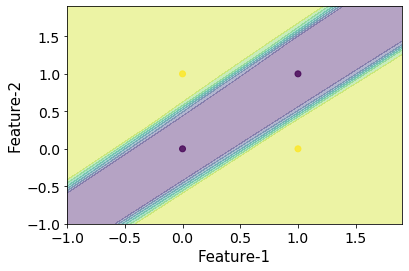

In [141]:
plot_decision_boundaries(X, y, SolverXorForwardBackward)